In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [173]:
df=pd.read_csv('data.csv')
df.head()

,age,married_status
0,23,0
1,21,1
2,56,1
3,34,0
4,45,1


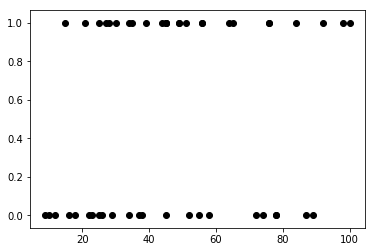

In [174]:
plt.scatter(df['age'],df['married_status'],color='black')
plt.show()

In [182]:
class logistic_regression:
    def __init__(self,eta=0.01,b_0=0):
        self.N=0
        self.eta=eta
        self.bias_val=b_0
        self.b=0
     
    #Sigmoid Function
    def sigmoid(self,z):
        value=1/(1+(np.exp(-z)))
        return value
    
    # basic Gradient part [sigmoid(z)-y]x at b
    def gradient_at_b(self,x,y,b,bias):
        for_coef=0
        for i in range(self.N):
            z=bias+(b*x[i])
            for_coef=for_coef+((self.sigmoid(z)-y[i])*x[i])
        return for_coef
    
    #basic gradient part for bias
    def gradient_at_bias(self,x,y,b,bias):
        for_bias=0
        for i in range(self.N):
            z=bias+(b*x[i])
            for_bias=for_bias+((self.sigmoid(z)-y[i]))
        return for_bias
    
    #Updating the gradients
    def grad_upgrade(self,x,y,b_old,bias_old):
        b_new=b_old-(self.gradient_at_b(x,y,b_old,bias_old))
        bias_new=bias_old-(self.gradient_at_bias(x,y,b_old,bias_old))
        return b_new,bias_new
    
    #Gradient Descent i.e fitting the model
    def fit(self,x,y,epoch=100):
        self.N=len(x)
        b=self.b
        bias=self.bias_val
        for i in range(epoch):
            b_new,bias_new=self.grad_upgrade(x,y,b,bias)
            b=b_new
            bias=bias_new
        self.b=b
        self.bias_val=bias
        
    #Calculate class
    def predict(self,val,threshold=0.5):
        length=len(val)
        result=[]
        for i in range(length):
            z=self.bias_val+(val[i]*self.b)
            sig_z=self.sigmoid(z)
            if (sig_z>=threshold):
                result.append(1)
            else:
                result.append(0)
        return result
    
    #repr
    def __repr__(self):
        return ( 'LogisticRegression(eta=0.01,b_0=0)')

In [183]:
x_train,x_test,y_train,y_test=train_test_split(df[['age']],df['married_status'],test_size=0.2)
X_train,X_test,Y_train,Y_test=train_test_split(df['age'],df['married_status'],test_size=0.2)

In [184]:
model=logistic_regression()
trainX=X_train.tolist()
trainY=Y_train.tolist()
model.fit(trainX,trainY)

In [185]:
#x_train=x_train.reshape(-1,1)
#y_train=y_train.reshape(-1,1)
model_sk=LogisticRegression(solver='saga')
model_sk.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [186]:
print('Prediction from my model',model.predict([29]))
print('\nPrediction from sklearn model',model_sk.predict([[29]]))

Prediction from my model [1]

Prediction from sklearn model [1]


In [187]:
# Accuracy Check of sklearn's model
y_predict=model_sk.predict(x_test)
print(accuracy_score(y_test,y_predict)*100,'%')
h=confusion_matrix(y_test,y_predict)
print('\n',h)
type(h)

40.0 %

 [[0 6]
 [0 4]]


numpy.ndarray

In [188]:
# Accuracy Check of my model
predict=model.predict(X_test.tolist())
tp,fp,tn,fn=0,0,0,0
Y_test=Y_test.tolist()
for i in range(len(Y_test)):
    if(predict[i]==1 and Y_test[i]==1):
        tp+=1
    elif(predict[i]==1 and Y_test[i]==0):
        fp+=1
    elif(predict[i]==0 and Y_test[i]==0):
        tn+=1
    elif(predict[i]==0 and Y_test[i]==1):
        fn+=1
print(((tp+tn)/(tp+tn+fp+fn))*100,'%\n')
confusion_mat=[[0,'P','N'],['T',tp,tn],['F',fp,fn]]
for r in confusion_mat:
    print(r)
    


50.0 %

[0, 'P', 'N']
['T', 5, 0]
['F', 5, 0]
